## 유방암 자료

### 1. k-NN에서 k-value plot(x-축은 k의 값, y-축은 정분류율을 나타내는 꺾은선 그래프)을 작성하여 최적의 k값을 구하여라. k-NN 초매개변수의 최적조건을 구하여라.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
cancer = pd.read_csv('D:\Backup\바탕 화면\wisc_bc_data.csv')

del cancer['id']

k is 1, Accuracy is 1.000000
k is 2, Accuracy is 0.947276
k is 3, Accuracy is 0.956063
k is 4, Accuracy is 0.949033
k is 5, Accuracy is 0.947276
k is 6, Accuracy is 0.947276
k is 7, Accuracy is 0.943761
k is 8, Accuracy is 0.940246
k is 9, Accuracy is 0.942004
k is 10, Accuracy is 0.938489


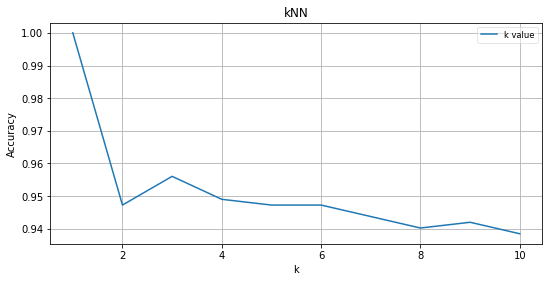

In [3]:
result = []
accuracy = []

k_range = range(1, 11)
for k in k_range:
    result.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(cancer.loc[:, cancer.columns != 'diagnosis'], cancer['diagnosis'])
    print('k is %d, Accuracy is %f' %(k, knn.score(cancer.loc[:, cancer.columns != 'diagnosis'],cancer['diagnosis'])))
    accuracy.append(knn.score(cancer.loc[:, cancer.columns != 'diagnosis'], cancer['diagnosis']))
    
def draw(x, y, title='K value for kNN'):
    plt.plot(x, y, label='k value')
    plt.title(title)
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend(loc='best', framealpha=0.5, prop={'size':'small'})
    plt.tight_layout(pad=1)
    plt.gcf().set_size_inches(8,4)
    plt.show()

draw(result, accuracy, 'kNN')

* k가 최적의 값인 3일때 k-NN 초매개변수의 최적조건이 된다.

### 2. k-NN 초매개변수의 최적조건 하에서 훈련자료와 테스트자료(80:20)를 각각 100번씩 서로 다른 자료를 만들어 k-NN 알고리즘을 이용하여 정분류율의 분포를 구하고 분석하여라.

In [4]:
from sklearn.metrics import accuracy_score

X = cancer.loc[:, cancer.columns != 'diagnosis']
y =  cancer['diagnosis']

Accuracy=[]

for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(cancer.loc[:, cancer.columns !='diagnosis'], cancer['diagnosis'],test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    Accuracy.append(accuracy_score(y_test, y_pred))

(array([ 3.,  2.,  7., 26., 14., 12., 27.,  6.,  1.,  2.]),
 array([0.86842105, 0.87982456, 0.89122807, 0.90263158, 0.91403509,
        0.9254386 , 0.93684211, 0.94824561, 0.95964912, 0.97105263,
        0.98245614]),
 <a list of 10 Patch objects>)

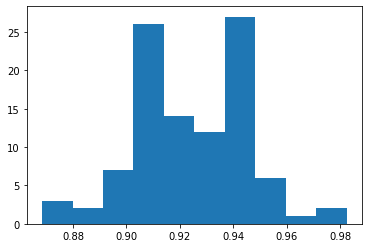

In [5]:
plt.hist(Accuracy)

[(0, 1.05)]

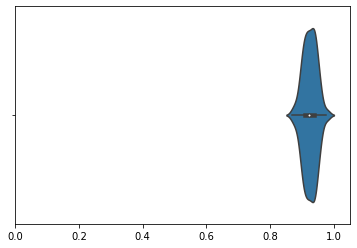

In [6]:
ax = sns.violinplot(Accuracy)
ax.set(xlim=(0, 1.05))

[(0, 1.05)]

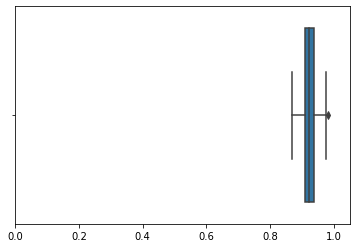

In [7]:
ax = sns.boxplot(Accuracy)
ax.set(xlim=(0, 1.05))

### 분석
* 분포를 보았을때 0.92 부근에 많이 모여있는 쌍봉형 분포이고 이상값은 없음을 알 수 있다.

### 3. 2번에서 사용한 동일한 훈련자료와 테스트자료를 이용하여 로지스틱 회귀를 100번 실시하고 정분류율의 분포를 구하고 분석하여라. 3번의 분석결과와 비교하여라.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

cancer = pd.read_csv('D:\Backup\바탕 화면\wisc_bc_data.csv')

X = cancer.loc[:, cancer.columns != 'diagnosis']
y =  cancer['diagnosis']


Accuracy=[]

X_train, X_test, y_train, y_test = train_test_split(cancer.loc[:, cancer.columns != 'diagnosis'],
                                                    cancer['diagnosis'],test_size=0.2)
 

logit = LogisticRegression()
logit.fit(X_train, y_train)

print(logit.coef_)
print(logit.intercept_)

[[-6.84573971e-10 -8.74980516e-16 -2.28407647e-15 -4.93652136e-15
   3.61357716e-14 -1.35260963e-17  5.80930211e-19  1.71260542e-17
   9.24055907e-18 -2.58844919e-17 -1.08308542e-17  2.12237622e-17
  -2.19251182e-16  1.51224708e-16  7.66234897e-15 -1.34269082e-18
  -1.14677428e-18 -1.07636739e-18 -5.34266433e-19 -3.62715204e-18
  -4.94589517e-19 -5.68383126e-16 -2.81195853e-15 -2.84528248e-15
   9.44573724e-14 -1.72061844e-17  1.14462145e-17  3.26742762e-17
   1.06599824e-17 -3.50722302e-17 -1.08889991e-17]]
[-1.69965859e-16]


In [9]:
y_pred = logit.predict(X_test)
print(y_test)
print(y_pred)

419    M
507    B
193    M
110    B
217    B
      ..
174    M
169    B
360    M
196    M
374    B
Name: diagnosis, Length: 114, dtype: object
['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B']


In [10]:
print(accuracy_score(y_test, y_pred))

0.543859649122807


In [11]:
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(cancer.loc[:, cancer.columns !='diagnosis'], cancer['diagnosis'],test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    Accuracy.append(accuracy_score(y_test, y_pred))

(array([ 2.,  4.,  3., 13., 16., 21., 17., 12., 10.,  2.]),
 array([0.6754386 , 0.69298246, 0.71052632, 0.72807018, 0.74561404,
        0.76315789, 0.78070175, 0.79824561, 0.81578947, 0.83333333,
        0.85087719]),
 <a list of 10 Patch objects>)

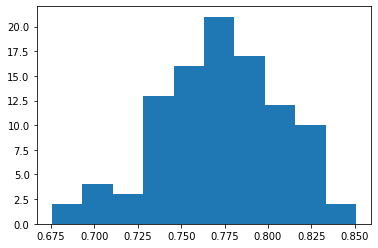

In [12]:
plt.hist(Accuracy)

[(0, 1.05)]

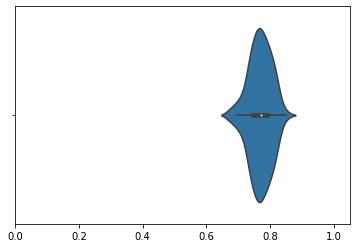

In [13]:
ax = sns.violinplot(Accuracy)
ax.set(xlim=(0, 1.05))

[(0, 1.05)]

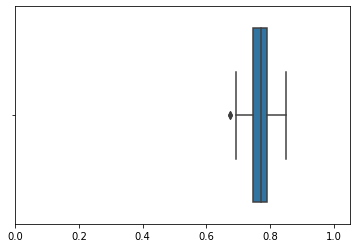

In [14]:
ax = sns.boxplot(Accuracy)
ax.set(xlim=(0, 1.05))

### 분석
* 분포를 보았을 때 2번에 비해 분포의 모양은 약간 더 넓은 단봉형 분포이고 0.77부근에 값이 많이 모여있는 것을 알 수 있다.

## 와인 자료

### 1. k-NN에서 k-value plot(x-축은 k의 값, y-축은 정분류율을 나타내는 꺾은선 그래프)을 작성하여 최적의 k값을 구하여라. k-NN 초매개변수의 최적조건을 구하여라.

In [2]:
wine = pd.read_csv('D:\Backup\바탕 화면\wine.csv')

k is 1, Accuracy is 1.000000
k is 2, Accuracy is 0.876404
k is 3, Accuracy is 0.870787
k is 4, Accuracy is 0.825843
k is 5, Accuracy is 0.786517
k is 6, Accuracy is 0.775281
k is 7, Accuracy is 0.747191
k is 8, Accuracy is 0.775281
k is 9, Accuracy is 0.775281
k is 10, Accuracy is 0.792135


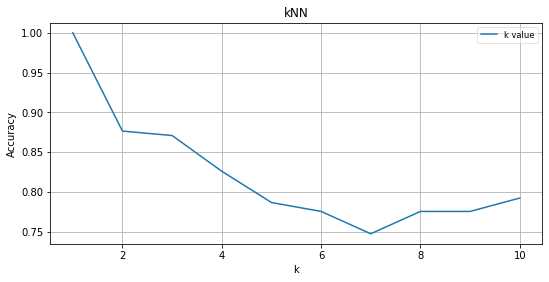

In [3]:
result = []
accuracy = []

k_range = range(1, 11)
for k in k_range:
    result.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(wine.loc[:, wine.columns != 'Cultivar'], wine['Cultivar'])
    print('k is %d, Accuracy is %f' %(k, knn.score(wine.loc[:, wine.columns != 'Cultivar'],wine['Cultivar'])))
    accuracy.append(knn.score(wine.loc[:, wine.columns != 'Cultivar'], wine['Cultivar']))

def draw(x, y, title='K value for kNN'):
    plt.plot(x, y, label='k value')
    plt.title(title)
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend(loc='best', framealpha=0.5, prop={'size':'small'})
    plt.tight_layout(pad=1)
    plt.gcf().set_size_inches(8,4)
    plt.show()

draw(result, accuracy, 'kNN')

* k가 최적의 값인 2가 될 때 k-NN 초매개변수의 최적조건이 된다.

### 2. k-NN 초매개변수의 최적조건 하에서 훈련자료와 테스트자료(80:20)를 각각 100번씩 서로 다른 자료를 만들어 k-NN 알고리즘을 이용하여 정분류율의 분포를 구하고 분석하여라.

In [4]:
from sklearn.metrics import accuracy_score

X = wine.loc[:, wine.columns != 'Cultivar']
y =  wine['Cultivar']

Accuracy=[]

for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(wine.loc[:, wine.columns !='Cultivar'], wine['Cultivar'],test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    Accuracy.append(accuracy_score(y_test, y_pred))

(array([ 3.,  3.,  5., 13., 28., 14., 17.,  7.,  8.,  2.]),
 array([0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333]),
 <a list of 10 Patch objects>)

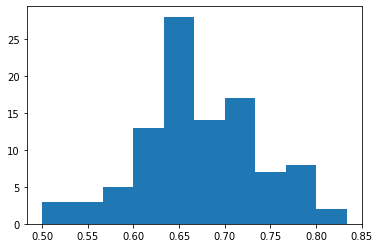

In [5]:
plt.hist(Accuracy)

[(0, 1.05)]

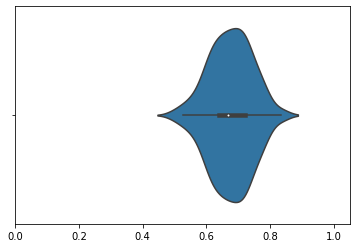

In [6]:
ax = sns.violinplot(Accuracy)
ax.set(xlim=(0, 1.05))

[(0, 1.05)]

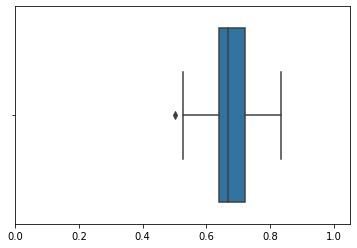

In [8]:
ax = sns.boxplot(Accuracy)
ax.set(xlim=(0, 1.05))

### 분석
* 분포를 보았을 때 0.65부근에 값이 많이 모여있음을 알 수 있다.

### 3. 2번에서 사용한 동일한 훈련자료와 테스트자료를 이용하여 로지스틱 회귀를 100번 실시하고 정분류율의 분포를 구하고 분석하여라. 3번의 분석결과와 비교하여라.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

wine = pd.read_csv('D:\Backup\바탕 화면\wine.csv')

X = wine.loc[:, wine.columns != 'Cultivar']
y =  wine['Cultivar']

Accuracy=[]

X_train, X_test, y_train, y_test = train_test_split(wine.loc[:, wine.columns != 'Cultivar'], wine['Cultivar'],test_size=0.2)

logit = LogisticRegression()
logit.fit(X_train, y_train)

print(logit.coef_)
print(logit.intercept_)

[[-0.13836717  0.18750986  0.1183952  -0.21702569 -0.03848878  0.19306668
   0.50283914 -0.04057603  0.15091832 -0.07847443 -0.00338881  0.34536572
   0.01038515]
 [ 0.5264141  -0.71594001 -0.09558026  0.1919263   0.01110074  0.33311383
   0.47136046  0.05460182  0.28285192 -1.05768273  0.2530053   0.43859586
  -0.01167248]
 [-0.38804693  0.52843015 -0.02281494  0.02509939  0.02738805 -0.52618052
  -0.9741996  -0.01402579 -0.43377024  1.13615716 -0.24961649 -0.78396159
   0.00128733]]
[-0.03385263  0.08774793 -0.05389529]


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
y_pred = logit.predict(X_test)
print(y_test)
print(y_pred)

153    3
152    3
81     2
103    2
17     1
26     1
53     1
170    3
165    3
158    3
116    2
137    3
70     2
45     1
162    3
161    3
84     2
115    2
6      1
102    2
135    3
7      1
100    2
117    2
93     2
15     1
131    3
78     2
42     1
69     2
24     1
154    3
177    3
151    3
74     2
13     1
Name: Cultivar, dtype: int64
[3 3 1 2 1 1 1 3 3 3 2 3 1 1 3 3 2 2 1 2 3 1 2 2 2 1 3 2 1 2 1 3 3 3 1 1]


In [11]:
print(accuracy_score(y_test, y_pred))

0.9166666666666666


In [12]:
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(wine.loc[:, wine.columns !='Cultivar'], wine['Cultivar'],test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    Accuracy.append(accuracy_score(y_test, y_pred))

(array([ 2.,  3.,  8., 33., 15., 17., 18.,  3.,  0.,  1.]),
 array([0.5       , 0.53611111, 0.57222222, 0.60833333, 0.64444444,
        0.68055556, 0.71666667, 0.75277778, 0.78888889, 0.825     ,
        0.86111111]),
 <a list of 10 Patch objects>)

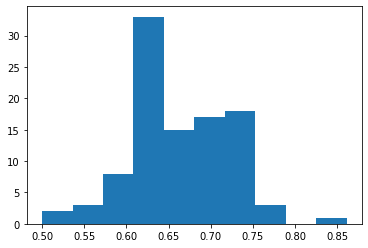

In [13]:
plt.hist(Accuracy)

[(0, 1.05)]

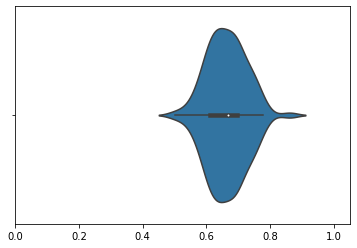

In [14]:
ax = sns.violinplot(Accuracy)
ax.set(xlim=(0, 1.05))

[(0, 1.05)]

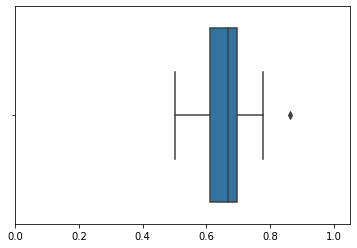

In [15]:
ax = sns.boxplot(Accuracy)
ax.set(xlim=(0, 1.05))

### 분석
* 2번의 히스토그램과 비교했을 때 0.63부근에 값이 많이 분포하고 이상값이 하나 존재한다.